# Exploration 06 - more plotting

* Continue from Exploration 05
* More plottings
* Check HDF5 format

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
sns.set_context("poster")

In [2]:
df = pd.read_hdf('data1-zdc.h5', 'table')
df.head()

,timestamp,sensor_id,d_st,sensor_type,loc_dir,loc_spn,loc_pot,loc_num,coord_x,coord_y,coord_z,loc_pin,remark,value
0,2017-07-01,2702,1101,disp,NE,MS,end,2.0,NaN,NaN,NaN,NaN,NaN,881.38790
1,2017-07-01,212,1001,tmp,SE,MS,outer,1.0,1431.0,NaN,NaN,bot,NaN,12.53911
2,2017-07-01,146,1101,disp,SW,MS,end,2.0,640.0,NaN,NaN,NaN,NaN,754.42760
3,2017-07-01,211,1001,tmp,SE,MS,inner,2.0,4595.0,NaN,NaN,top,NaN,12.75999
4,2017-07-01,145,1101,disp,SW,MS,end,1.0,5909.0,NaN,NaN,NaN,NaN,-2.84139


In [3]:
df.dtypes
# dtypes are the same!

timestamp      datetime64[ns]
sensor_id               int64
d_st                    int64
sensor_type          category
loc_dir              category
loc_spn              category
loc_pot              category
loc_num              category
coord_x               float64
coord_y               float64
coord_z               float64
loc_pin              category
remark               category
value                 float64
dtype: object

In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Columns: 14 entries, timestamp to value
dtypes: category(7), datetime64[ns](1), float64(4), int64(2)
memory usage: 67.7 MB


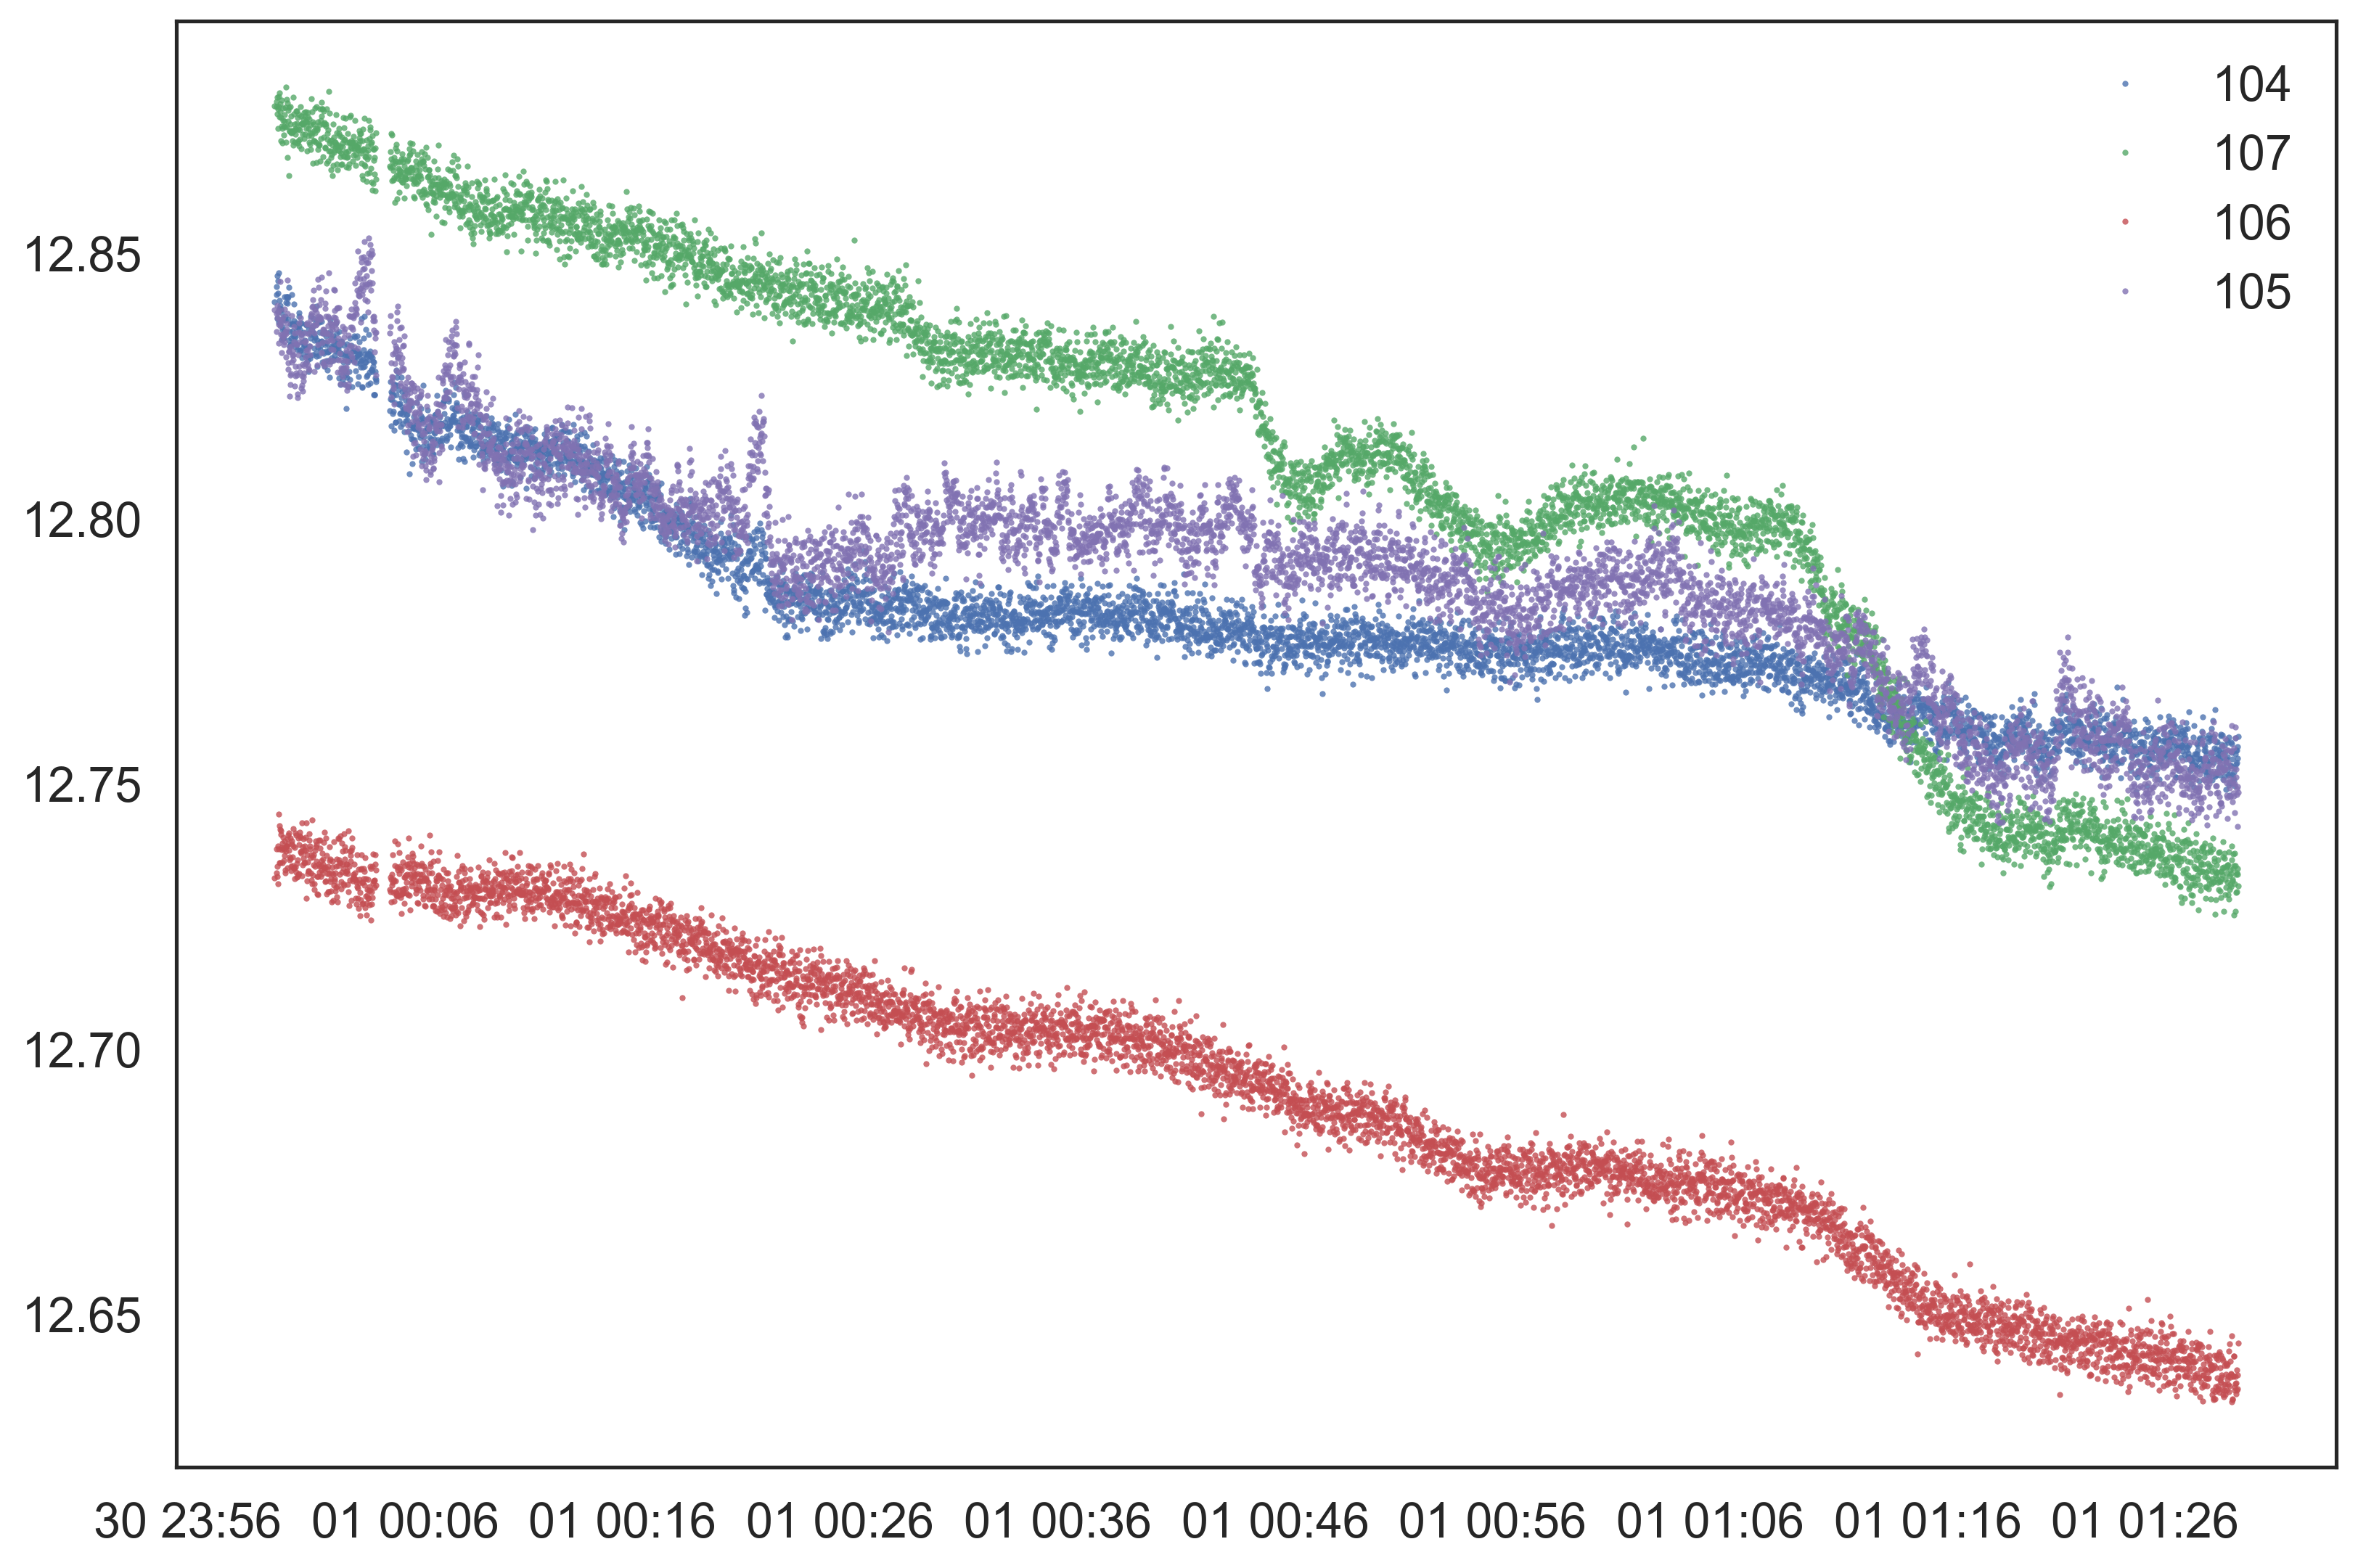

In [5]:
# Plot temperature data

# tmp NWMS

df_tmp = df[(df['sensor_type'] == 'tmp') & (df['loc_dir'] == 'NW') & (df['loc_spn'] == 'MS')]
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

for sensor in df_tmp.sensor_id.unique():
    x = df_tmp[df_tmp['sensor_id'] == sensor].timestamp
    y = df_tmp[df_tmp['sensor_id'] == sensor].value
    
    ax.plot_date(x, y, alpha=0.8, markersize=2, label=sensor)
    ax.legend()

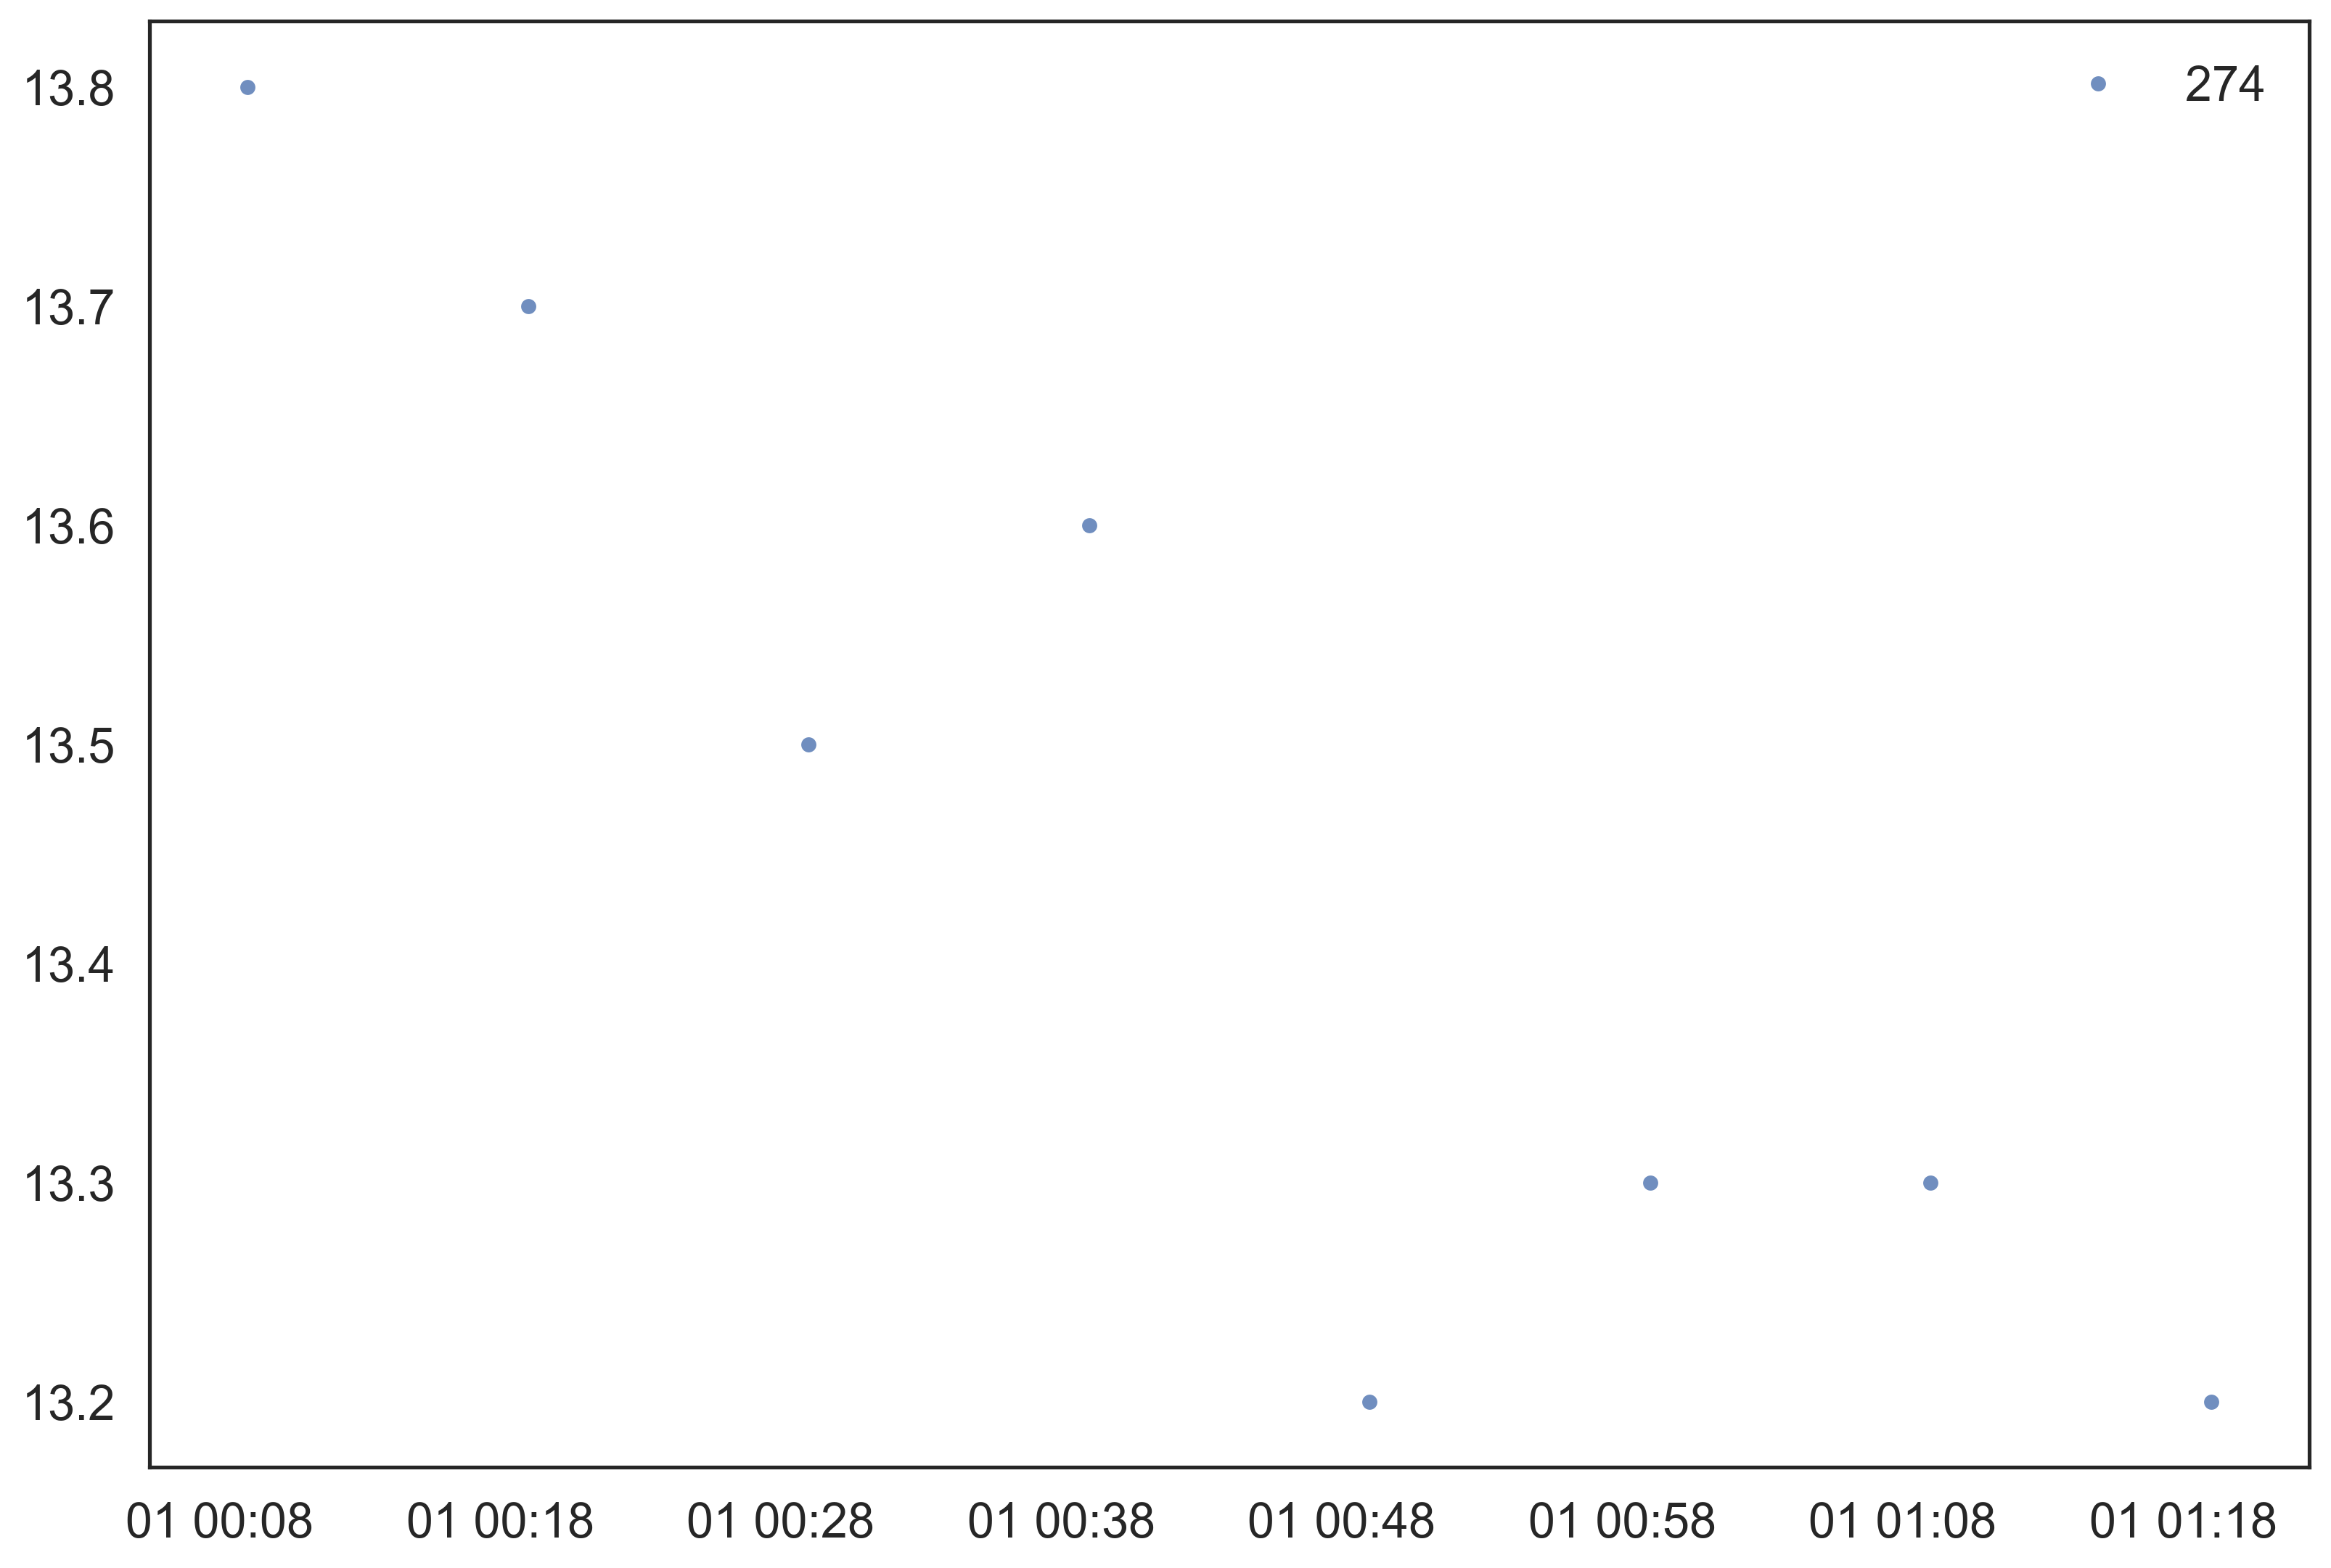

In [6]:
# tmp_road

df_tmp_road = df[(df['sensor_type'] == 'tmp_road')]

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

for sensor in df_tmp_road.sensor_id.unique():
    x = df_tmp_road[df_tmp_road['sensor_id'] == sensor].timestamp
    y = df_tmp_road[df_tmp_road['sensor_id'] == sensor].value
    
    ax.plot_date(x, y, alpha=0.8, markersize=5, label=sensor)
    ax.legend()

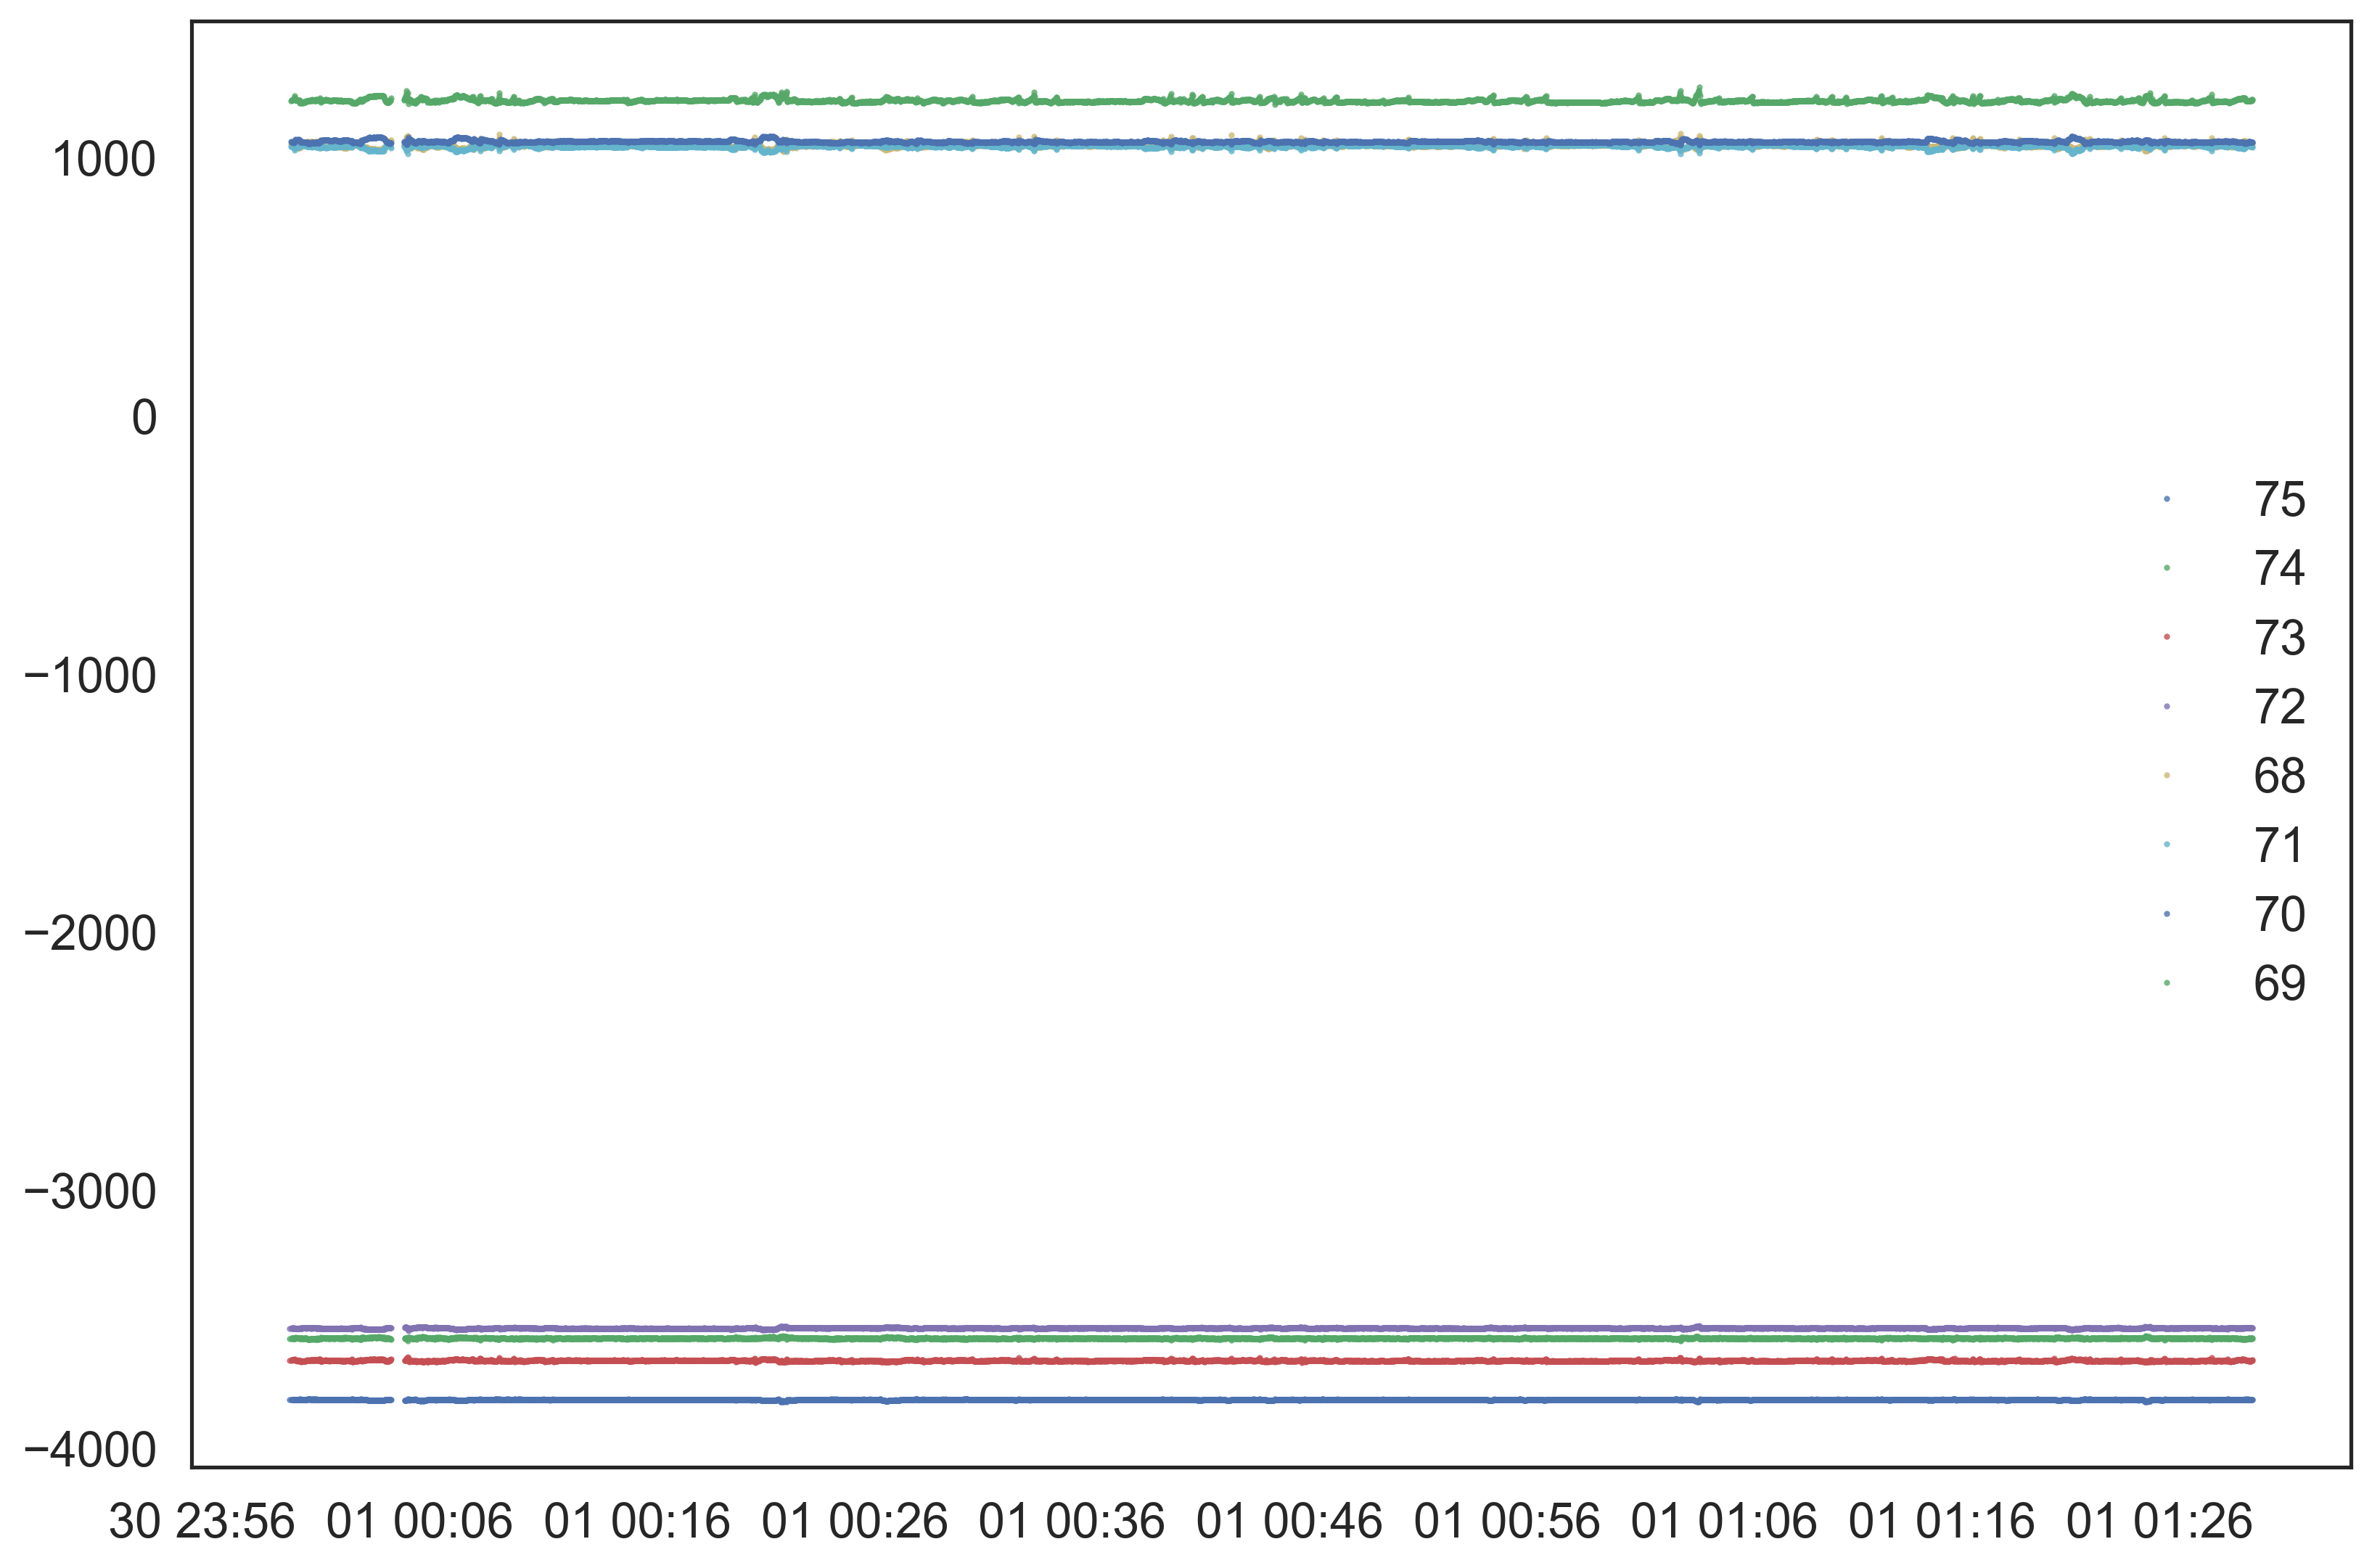

In [7]:
# str NWMS

df_str = df[(df['sensor_type'] == 'str') 
            & (df['loc_dir'] == 'NW') 
            & (df['loc_spn'] == 'MS')
            & (df['loc_pot'] == 'outer')]

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

for sensor in df_str.sensor_id.unique():
    x = df_str[df_str['sensor_id'] == sensor].timestamp
    y = df_str[df_str['sensor_id'] == sensor].value
    
    ax.plot_date(x, y, alpha=0.8, markersize=2, label=sensor)
    ax.legend()
    
# see .svg for sensor location, with ref to loc_num

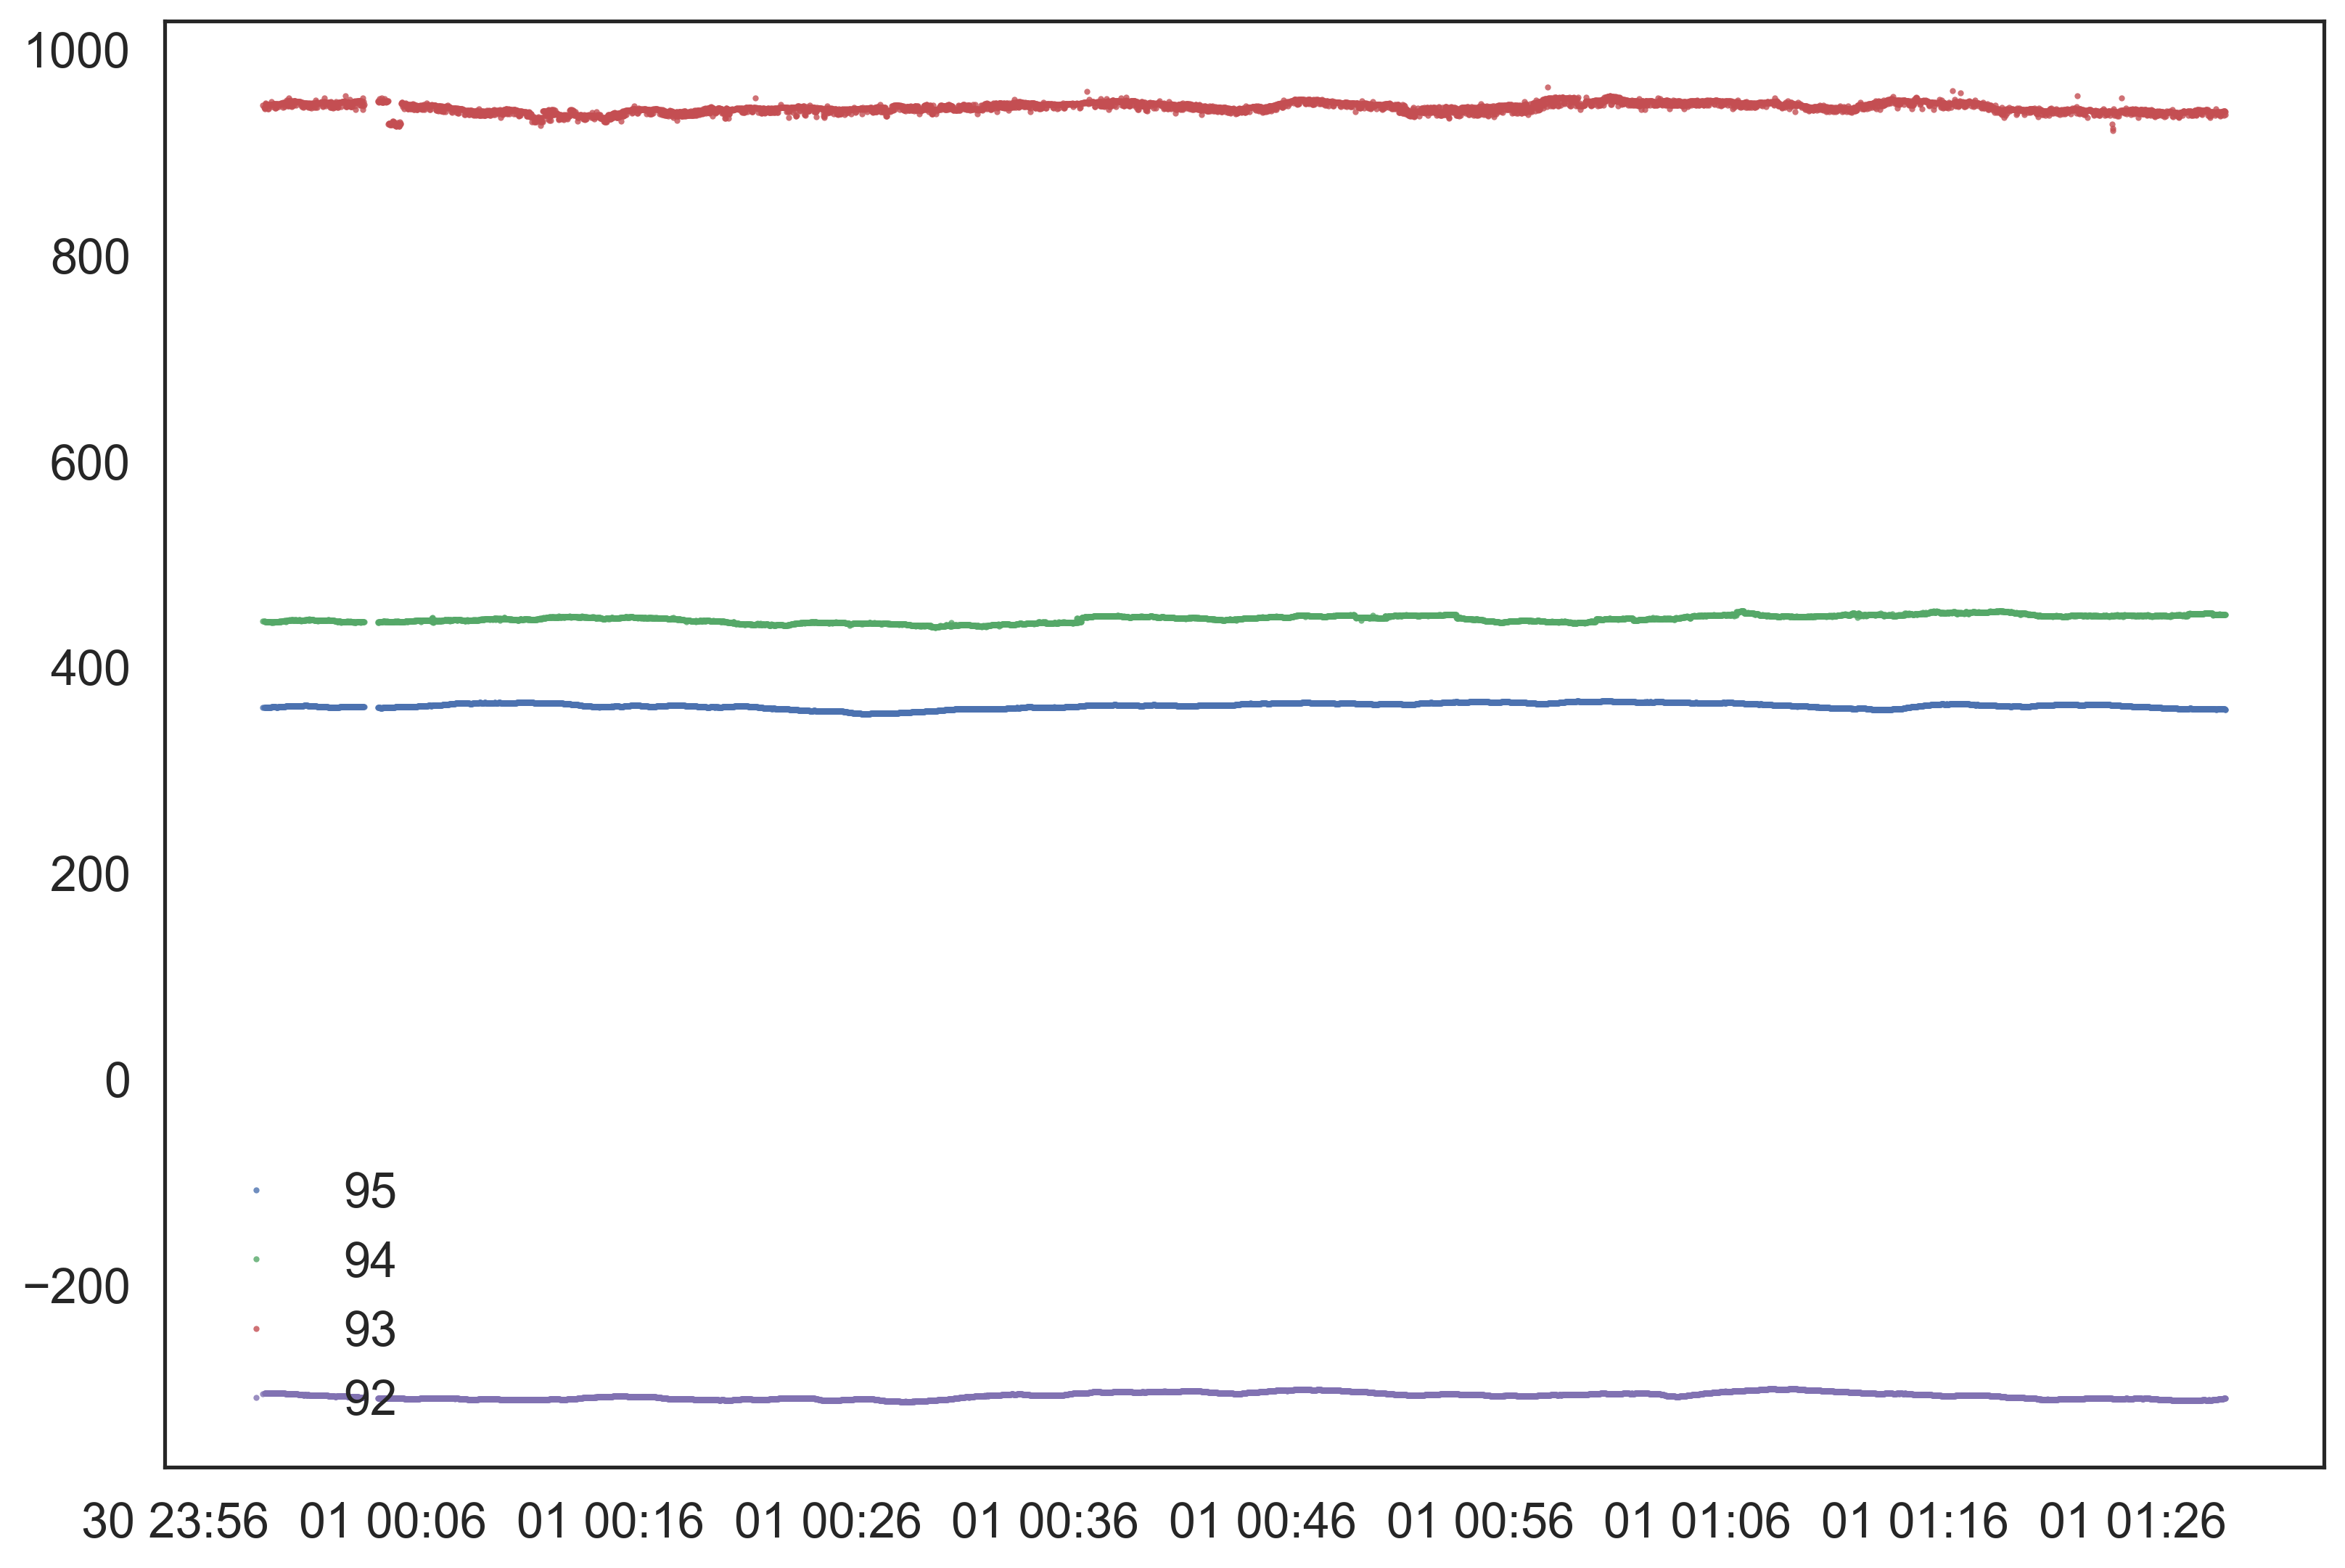

In [8]:
# dsp NWMS

df_dsp = df[(df['sensor_type'] == 'disp') 
            & (df['loc_dir'] == 'NW') 
            & (df['loc_spn'] == 'MS')]

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

for sensor in df_dsp.sensor_id.unique():
    x = df_dsp[df_dsp['sensor_id'] == sensor].timestamp
    y = df_dsp[df_dsp['sensor_id'] == sensor].value
    
    ax.plot_date(x, y, alpha=0.8, markersize=2, label=sensor)
    ax.legend()
    
# see .svg for sensor location, with ref to loc_num